<a href="https://colab.research.google.com/github/rajlm10/Gradient-Descent-/blob/main/SymPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sympy
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
x,y=symbols('x y')

In [3]:
cost1=x**2+y**2
cost1

x**2 + y**2

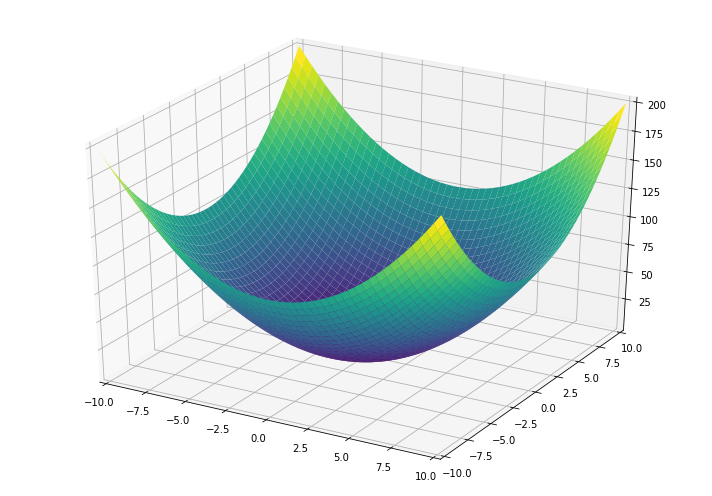

In [4]:
sympy.plotting.plot3d(cost1, (x, -10, 10), (y, -10, 10),size=(10,7));


In [5]:
def compute_cost(costfxn,x0,y0):
  return round(costfxn.evalf(subs={x:x0,y:y0}),3)

In [6]:
def compute_gradients(costfxn,x0,y0):
  dX0=diff(costfxn,x).evalf(subs={x:x0,y:y0})
  dY0=diff(costfxn,y).evalf(subs={x:x0,y:y0})
  return dX0,dY0




In [7]:
def gradient_descent(costfxn,num_iters,learning_rate,verbose=False):
  xtemp=np.random.randint(50)
  ytemp=np.random.randint(50)
  tempcost=compute_cost(costfxn,xtemp,ytemp)
  costs=[]
  costs.append(tempcost)
  if(verbose):
    print("The cost is: "+str(tempcost))
  for i in range(num_iters):
    xtemp=round(xtemp-learning_rate*compute_gradients(costfxn,xtemp,ytemp)[0],3)
    ytemp=round(ytemp-learning_rate*compute_gradients(costfxn,xtemp,ytemp)[1],3)
    tempcost=compute_cost(costfxn,xtemp,ytemp)
    if(tempcost>10000):
      print("Gradient explosion, trying with lower learning rate")
      learning_rate=learning_rate/10
      print("Learning rate changed to "+str(round(learning_rate,2)))
    if(verbose):
      if(i%10==0):
        print("The cost is: "+str(tempcost))
    costs.append(tempcost)
  xopt=xtemp
  yopt=ytemp
  return xopt,yopt,costs


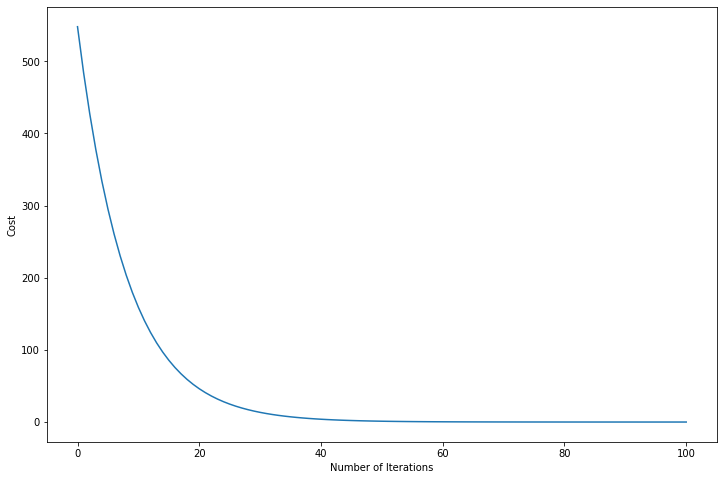

In [8]:
xopt,yopt,cost_array=gradient_descent(cost1,100,0.03)
plt.figure(figsize=(12,8))
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.plot( [i for i in range(101)],cost_array, linestyle='-')
plt.show()

In [9]:
xopt,yopt,cost_array=gradient_descent(cost1,50,1.1)

Gradient explosion, trying with lower learning rate
Learning rate changed to 0.11


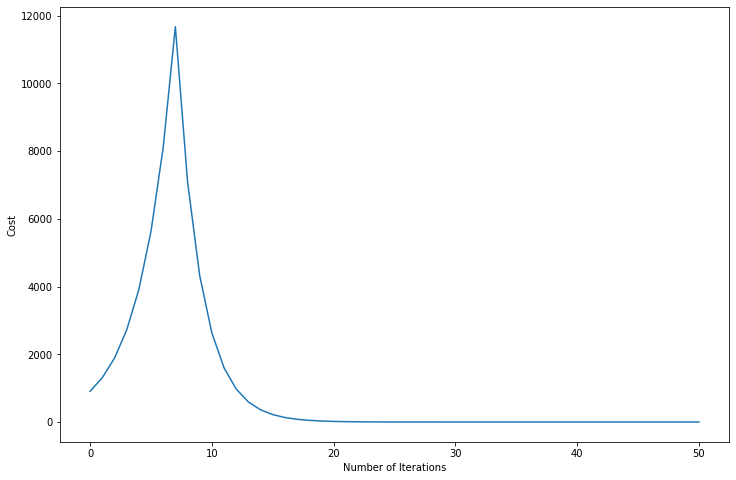

In [10]:
plt.figure(figsize=(12,8))
plt.plot( [i for i in range(51)],cost_array, linestyle='-')
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()